<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2 Assignment 2*

# Document Representations: Bag-Of-Words

In [1]:
import re
import string

# !pip install -U nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mattmastin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mattmastin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [2]:
# ##### come back to this #####
# import bs4
# import requests as r
# import re
# import traceback

# number = '1'
# start = 1
# end = 100

# description = []
# title = []

# def initiate():
    
#     url = 'https://www.indeed.com/q-Data-Scientist-jobs.html'
    
#     df = pd.read_csv('job_listings.csv')
    
#     for i in range(start, end):
        
#         res_des = r.get(url + df['href'][i])
        
#         res_des.raise_for_status()
        
#         soup_des = bs4.BeautifulSoup(res_des.text)
        
        

In [29]:
df = pd.read_csv('job_listings.csv')
print(df.shape)
df.head()

(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [30]:
df = df[['description', 'title']]

## 2) Use Spacy to tokenize / clean the listings 

In [31]:
def tokenize(text):
    tokens = re.sub(r'^a-zA-Z ^0-9', '', text)
    
    tokens = tokens.lower().split()
    
    return tokens


In [32]:
df['tokens'] = df['description'].apply(tokenize)

In [33]:
df['tokens'][0]

['b"<div><div>job',
 'requirements:</div><ul><li><p>\\nconceptual',
 'understanding',
 'in',
 'machine',
 'learning',
 'models',
 'like',
 'nai\\xc2\\xa8ve',
 'bayes,',
 'k-means,',
 'svm,',
 'apriori,',
 'linear/',
 'logistic',
 'regression,',
 'neural,',
 'random',
 'forests,',
 'decision',
 'trees,',
 'k-nn',
 'along',
 'with',
 'hands-on',
 'experience',
 'in',
 'at',
 'least',
 '2',
 'of',
 'them</p>\\n</li><li><p>intermediate',
 'to',
 'expert',
 'level',
 'coding',
 'skills',
 'in',
 'python/r.',
 '(ability',
 'to',
 'write',
 'functions,',
 'clean',
 'and',
 'efficient',
 'data',
 'manipulation',
 'are',
 'mandatory',
 'for',
 'this',
 'role)</p>\\n</li><li><p>exposure',
 'to',
 'packages',
 'like',
 'numpy,',
 'scipy,',
 'pandas,',
 'matplotlib',
 'etc',
 'in',
 'python',
 'or',
 'ggplot2,',
 'dplyr,',
 'tidyr',
 'in',
 'r</p>\\n</li><li><p>ability',
 'to',
 'communicate',
 'model',
 'findings',
 'to',
 'both',
 'technical',
 'and',
 'non-technical',
 'stake',
 'holders</p>\\n

In [16]:
import spacy

nlp = spacy.load('en_core_web_lg')

# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [34]:
from collections import Counter

word_counts = Counter()

df['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('and', 11513),
 ('to', 6776),
 ('the', 5220),
 ('of', 4538),
 ('data', 3748),
 ('in', 3514),
 ('a', 3448),
 ('with', 3037),
 ('for', 2008),
 ('or', 1720)]

In [27]:
##### Your Code Here #####

vect = CountVectorizer(stop_words='english')

vect.fit(df)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [28]:
print(vect.get_feature_names())

['description', 'title', 'tokens']


In [20]:
sparse_dtm = vect.transform(df)

In [22]:
dtm = pd.DataFrame(sparse_dtm.todense(), columns = vect.get_feature_names())

In [26]:
dtm.shape

(3, 3)

# 4) Visualize the most common word counts

In [35]:
def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns=['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x /total_docs)
    
    return wc.sort_values(by='rank')

In [36]:
wc = count(df['tokens'])

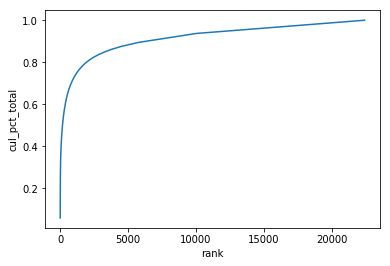

In [38]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_pct_total', data=wc);

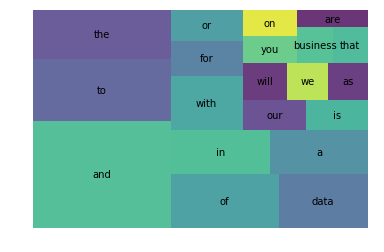

In [40]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=0.8)
plt.axis('off')
plt.show()

In [42]:
from spacy.tokenizer import Tokenizer

tokenizer = Tokenizer(nlp.vocab)

tokens = []

for doc in tokenizer.pipe(df['description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    
    tokens.append(doc_tokens)
    
df['tokens2'] = tokens

In [43]:
df['tokens2'].head()

0    [b"<div><div>job, requirements:</div><ul><li><...
1    [b'<div>job, description<br/>\n<br/>\n<p>as, d...
2    [b'<div><p>as, data, scientist, working, consu...
3    [b'<div, class="jobsearch-jobmetadataheader, i...
4    [b'<ul><li>location:, usa, \xe2\x80\x93, multi...
Name: tokens2, dtype: object

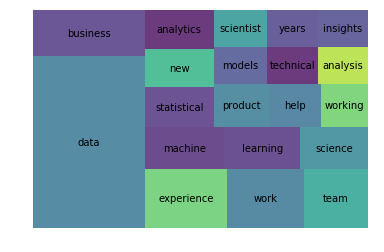

In [44]:
wc = count(df['tokens2'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha = 0.8)
plt.axis('off')
plt.show()

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [47]:
tfidf = TfidfVectorizer(stop_words='english')

sparse = tfidf.fit_transform(df['description'])

dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

dtm.head()

,00,000,02115,03,0356,04,057,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.095122,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


 # 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [48]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [49]:
nn.kneighbors(dtm)

(array([[0.        , 0.92715325, 0.94204437, 0.95423679, 0.95568407],
        [0.        , 0.98102963, 0.98490249, 0.98843362, 0.98843362],
        [0.        , 1.08175605, 1.08240146, 1.09070377, 1.09208917],
        ...,
        [0.        , 0.        , 0.92349448, 0.93045933, 0.93258793],
        [0.        , 0.05288865, 0.8017147 , 0.80804361, 0.81310918],
        [0.        , 1.06080126, 1.06631173, 1.07108946, 1.07123888]]),
 array([[  0, 276, 301,  71, 264],
        [  1, 384, 307, 153, 413],
        [  2, 307, 325, 313, 407],
        ...,
        [ 44, 423, 301, 264, 276],
        [424, 382, 276, 264, 301],
        [425, 264, 190, 201,  71]]))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.